# MHD Dispersion Relation Analysis

This notebook imports the `compute_max_real_eigenvalue` function from `spectear.py` and calculates the tearing dispersion relations for different widths, (`lam`), by varying the wavenumber (`k_star`).

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Import our MHD stability function
# Assuming the main code is saved as mhd_stability.py in the same directory
from spectear import compute_max_real_eigenvalue

## Parameter Setup

Let's define the parameter ranges we want to explore:

In [ ]:
# Define parameter values
# Wavenumber range
k_star_values = np.linspace(0.5, 1.3, 3)  # 20 values from 0.5 to 1.0

# Values of lambda - width of the modulation
lam_values = [5.0]

# Fixed parameters
N = 42   # Grid resolution (reduced for faster calculation)
S = 100  # Lundquist number

# Array to store results - dimensions: [lam_values, k_star_values]
growth_rates = np.zeros((len(lam_values), len(k_star_values)))

## Compute Dispersion Relations

Now we'll calculate the growth rates for each combination of parameters:

In [3]:
start_time = time.time()

# Loop over width parameters
for i, lam in enumerate(lam_values):
    print(f"Computing for lam = {lam}...")
    
    # Loop over wavenumbers
    for j, k_star in enumerate(k_star_values):
        # Compute the maximum eigenvalue (growth rate)
        result = compute_max_real_eigenvalue(k_star=k_star, lam=lam, N=N, S=S)
        growth_rates[i, j] = result
        
        # Print progress
        print(f"  k_star = {k_star:.2f}, growth rate = {result:.6f}")

elapsed_time = time.time() - start_time
print(f"\nTotal computation time: {elapsed_time:.2f} seconds")

# Save results to a file (optional)
# np.savez('mhd_dispersion_data.npz', 
#          k_star_values=k_star_values, 
#          lam_values=lam_values, 
#          growth_rates=growth_rates)

Computing for lam = 5.0...
Built operators
Inverted matrix
  k_star = 0.50, growth rate = 0.168295
Built operators
Inverted matrix
  k_star = 0.90, growth rate = 0.191790
Built operators
Inverted matrix
  k_star = 1.30, growth rate = 0.151938

Total computation time: 834.83 seconds


## Visualize Dispersion Relations

Now let's visualize the dispersion relations for each width parameter:

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/var/folders/78/jqqsyqfd7fb39q3szls2b9bc0000gn/T/ipykernel_16041/826549492.py:6: SyntaxWarning: invalid escape sequence '\l'
  label=f'$\lambda$ = {lam}')
/var/folders/78/jqqsyqfd7fb39q3szls2b9bc0000gn/T/ipykernel_16041/826549492.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f'Growth Rate $(\lambda)$', fontsize=14)


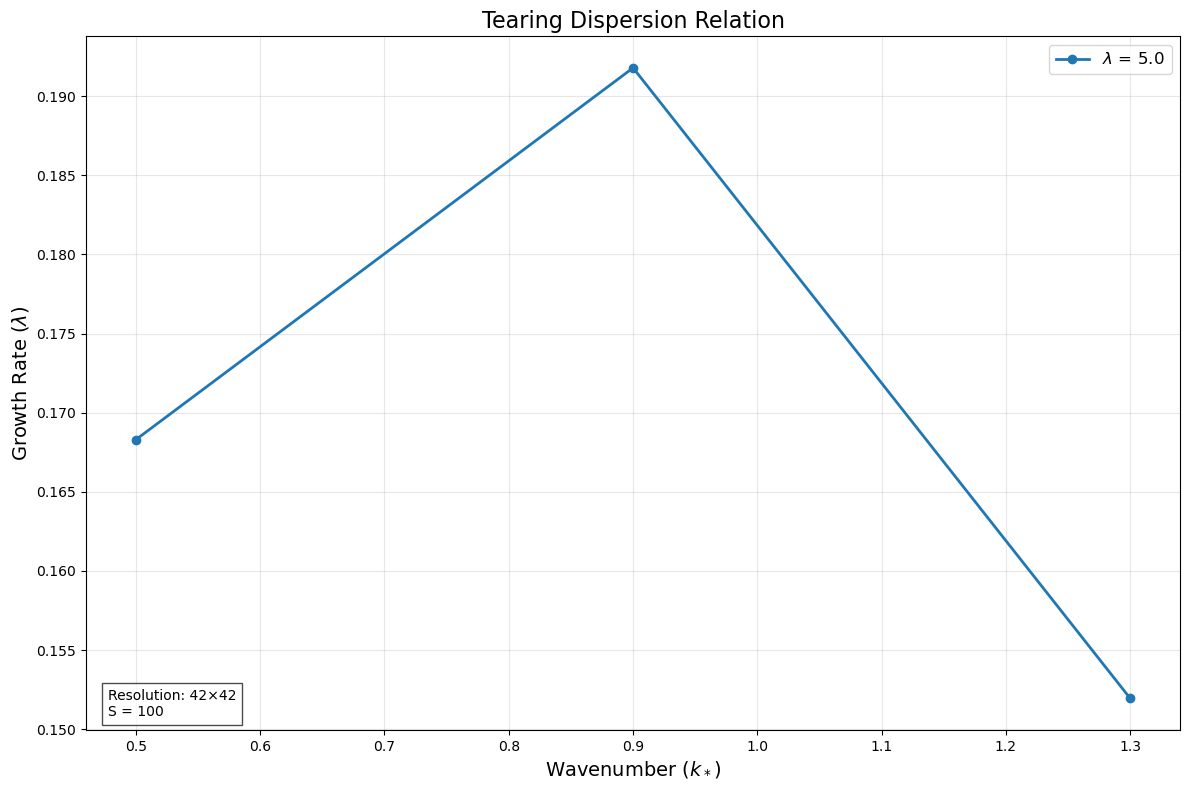

In [ ]:
plt.figure(figsize=(12, 8))

# Plot dispersion relation for each value of lam
for i, lam in enumerate(lam_values):
    plt.plot(k_star_values, growth_rates[i], marker='o', linewidth=2, 
             label=f'$\lambda$ = {lam}')


# Add labels and legend
plt.xlabel(f'Wavenumber $(k_*)$', fontsize=14)
plt.ylabel(f'Growth Rate $(\lambda)$', fontsize=14)
plt.title('Tearing Dispersion Relation', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add text box with computational parameters
plt.text(0.02, 0.02, f'Resolution: {N}×{N}\nS = {S}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()